https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/

In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import pandas as pd

pd.set_option( 'display.max_columns' , None ) 

In [3]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'

df = pd.read_csv( url , header = None , na_values = '?' ) 

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,5.0,4.0,4.0,NaN,NaN,NaN,3.0,5.0,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,4.0,2.0,NaN,NaN,NaN,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [5]:
df.isnull().sum()

0       1
1       0
2       0
3      60
4      24
5      58
6      56
7      69
8      47
9      32
10     55
11     44
12     56
13    104
14    106
15    247
16    102
17    118
18     29
19     33
20    165
21    198
22      1
23      0
24      0
25      0
26      0
27      0
dtype: int64

# KNNImputer Data Transform

In [6]:
data = df.values

X = data[ : , : -1 ]

y = data[ : , -1 ]

In [7]:
from numpy import isnan

In [8]:
print( f'missing : {sum( isnan( X ).flatten() )}' )

missing : 1605


In [9]:
from sklearn.impute import KNNImputer

In [10]:
imputer = KNNImputer( n_neighbors = 5 , weights = 'uniform' , metric = 'nan_euclidean' )

In [11]:
imputer.fit( X )

KNNImputer()

In [12]:
X_trans = imputer.transform( X )

In [13]:
from numpy import isnan

In [14]:
print( f'missing : {sum( isnan( X_trans ).flatten() )}' )

missing : 0


# KNNImputer and Model Evaluation

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
model = RandomForestClassifier()

In [17]:
from sklearn.impute import KNNImputer

In [18]:
imputer = KNNImputer()

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
steps = [ ('imputer' , imputer ) , 
          ( 'model' , model ) ]

pipeline = Pipeline( steps = steps )

In [21]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [22]:
cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 1 )

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
scores = cross_val_score( pipeline , X , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 , error_score = 'raise')

In [26]:
from numpy import mean

from numpy import std

In [27]:
print( f'RandomForest model | accuracy : {mean(scores):.3f} ( {std(scores):.3f} )' )

RandomForest model | accuracy : 0.773 ( 0.065 )


# KNNImputer and Different Number of Neighbors

In [28]:
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import cross_val_score

In [29]:
def evaluate_model( X , y , model ) :

    cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )

    scores = cross_val_score( model , X , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 )

    return scores

In [ ]:
from sklearn.pipeline import Pipeline

In [30]:
def get_models():

    models = dict()
    
    model = RandomForestClassifier()
    
    K = [ 1 , 3 , 5 , 7 , 9 , 15 , 18 , 21 ]
    
    for k in K :
        
        imputer = KNNImputer( n_neighbors = k )
        
        steps = [ ( 'imputer' , imputer ) ,
                  ( 'model' , model ) ]
        
        pipeline = Pipeline( steps = steps )
        
        models[ 'rf_knn_' + str( k ) ] = pipeline

    return models

In [37]:
models = get_models()

print( models )

{'rf_knn_1': Pipeline(steps=[('imputer', KNNImputer(n_neighbors=1)),
                ('model', RandomForestClassifier())]), 'rf_knn_3': Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('model', RandomForestClassifier())]), 'rf_knn_5': Pipeline(steps=[('imputer', KNNImputer()), ('model', RandomForestClassifier())]), 'rf_knn_7': Pipeline(steps=[('imputer', KNNImputer(n_neighbors=7)),
                ('model', RandomForestClassifier())]), 'rf_knn_9': Pipeline(steps=[('imputer', KNNImputer(n_neighbors=9)),
                ('model', RandomForestClassifier())]), 'rf_knn_15': Pipeline(steps=[('imputer', KNNImputer(n_neighbors=15)),
                ('model', RandomForestClassifier())]), 'rf_knn_18': Pipeline(steps=[('imputer', KNNImputer(n_neighbors=18)),
                ('model', RandomForestClassifier())]), 'rf_knn_21': Pipeline(steps=[('imputer', KNNImputer(n_neighbors=21)),
                ('model', RandomForestClassifier())])}


In [32]:
results = list()

names = list()


for name , model in models.items() :
    
    names.append( name )
    
    scores = evaluate_model( X , y , model ) 
    
    results.append( scores )
    
    print( f' model : {name} : {mean(scores):.3f} ( {std(scores):.3f} )' )

 model : rf_knn_1 : 0.700 ( 0.077 )
 model : rf_knn_3 : 0.726 ( 0.085 )
 model : rf_knn_5 : 0.778 ( 0.068 )
 model : rf_knn_7 : 0.769 ( 0.074 )
 model : rf_knn_9 : 0.779 ( 0.070 )
 model : rf_knn_15 : 0.806 ( 0.052 )
 model : rf_knn_18 : 0.814 ( 0.066 )
 model : rf_knn_21 : 0.831 ( 0.062 )


In [33]:
from matplotlib import pyplot

{'whiskers': [<matplotlib.lines.Line2D at 0x6547f60>,
 'caps': [<matplotlib.lines.Line2D at 0x653b390>,
 'boxes': [<matplotlib.lines.Line2D at 0x6547cf8>,
 'medians': [<matplotlib.lines.Line2D at 0x653b898>,
 'fliers': [<matplotlib.lines.Line2D at 0x6532a58>,
 'means': [<matplotlib.lines.Line2D at 0x6532cc0>,
  <matplotlib.lines.Line2D at 0x660b898>]}

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

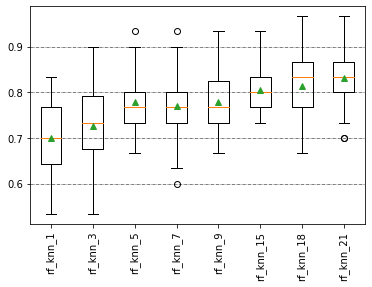

In [34]:
pyplot.boxplot( results , labels = names , showmeans = True )

pyplot.grid( axis = 'y' , color = 'black' , linestyle = '-.' , linewidth = 0.5 )

pyplot.xticks( rotation = 90 )

pyplot.show()